In [1]:
from pathlib import Path
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime as dt
from plotly.subplots import make_subplots
from collections import Counter

In [348]:
csv_file_path = Path("assets/pds_final.csv")
df_covid = pd.read_csv(csv_file_path)

# Convert the Index 'Date of Death' to datetime
df_covid['DATE_OF_DEATH'] = pd.to_datetime(df_covid['DATE_OF_DEATH'], errors='coerce').dt.date


# Convert Age and Total Morbidities to Integer
df_covid['AGE'] = pd.to_numeric(df_covid['AGE'], errors='coerce').astype('Int64')
df_covid['TOTAL_MORBIDITIES'] = pd.to_numeric(df_covid['TOTAL_MORBIDITIES'], errors='coerce').astype('Int64')
                                           
df_covid[df_covid['CASE_NUMBER'] == 'ME2020-01332']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning:

Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.



DATE_OF_DEATH   CASE_NUMBER  GENDER  AGE   RACE  LATINO RESIDENCE_ZIP  \
435    2020-03-10  ME2020-01332  Female   64  Black   False         60601   
436    2020-03-10  ME2020-01332  Female   64  Black   False         60601   

    MANNER_OF_DEATH                            MORBIDITY  TOTAL_MORBIDITIES  \
435         NATURAL                             COVID-19                  2   
436         NATURAL  HYPERTENSIVE CARDIOVASCULAR DISEASE                  2   

     ... PRIMARY_CAUSE_LINE_A PRIMARY_CAUSE_LINE_B PRIMARY_CAUSE_LINE_C  \
435  ...             COVID-19                  NaN                  NaN   
436  ...             COVID-19                  NaN                  NaN   

                  SECONDARY_CAUSE_LINE_A SECONDARY_CAUSE_LINE_B  \
435  HYPERTENSIVE CARDIOVASCULAR DISEASE                    NaN   
436  HYPERTENSIVE CARDIOVASCULAR DISEASE                    NaN   

    SECONDARY_CAUSE_LINE_C SECONDARY_CAUSE_LINE_D SECONDARY_CAUSE_LINE_E  \
435                    NaN                    NaN                    NaN   
436                    NaN                    NaN                    NaN   

    SECONDARY_CAUSE_LINE_F SECONDARY_CAUSE_LINE_G  
435                    NaN                    NaN  
436                    NaN                    NaN  

[2 rows x 21 columns]

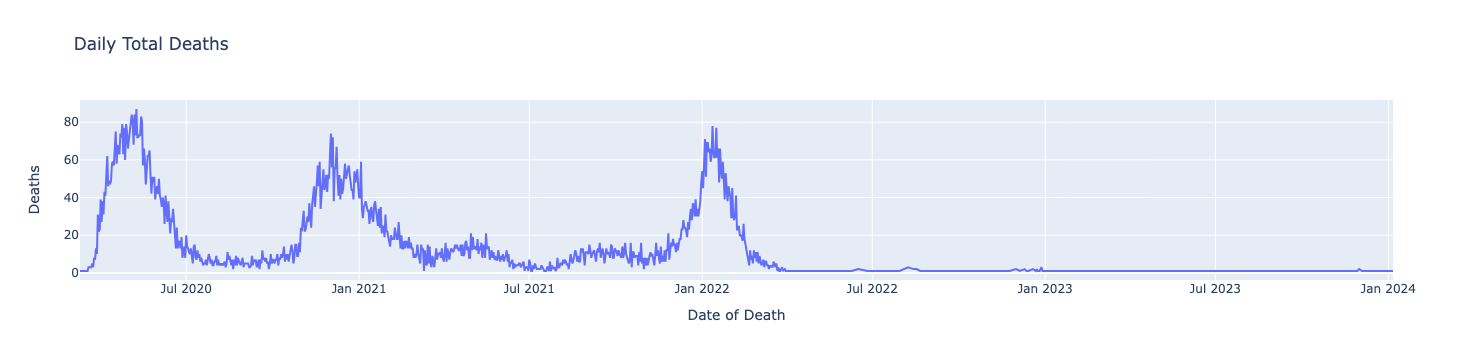

In [246]:
df_covid_trend_daily = df_covid.groupby(df_covid['DATE_OF_DEATH'])['CASE_NUMBER'].nunique().reset_index()

figure=px.line(df_covid_trend_daily,
               x='DATE_OF_DEATH',
               y='CASE_NUMBER',
               labels={'DATE_OF_DEATH': 'Date of Death', 'CASE_NUMBER': 'Deaths'},
               title="Daily Total Deaths")
figure.show()

In [247]:
# Extract unique values and count occurrences
unique_values_counts = df_covid.groupby(df_covid['GENERAL_MORBIDITY'])['GENERAL_MORBIDITY'].value_counts()

# Sort unique values by count (most occurrences to least)
sorted_unique_values_counts = unique_values_counts.sort_values(ascending=False)

# Create a list of tuples with (value, count)
sorted_unique_values_and_counts = [(value, count) for value, count in zip(sorted_unique_values_counts.index, sorted_unique_values_counts)]

# Print the list of tuples
# print(sorted_unique_values_and_counts)

strings_list = [f"{value}" for value, count in zip(sorted_unique_values_counts.index, sorted_unique_values_counts)]

# Join the list of strings into a single string
result_string = '\n'.join(strings_list)

# Print the result string
print(unique_values_counts)


GENERAL_MORBIDITY                                  GENERAL_MORBIDITY                                
ALZHEIMER'S DISEASE, SENILE, OR DEMENTIA           ALZHEIMER'S DISEASE, SENILE, OR DEMENTIA              1302
ANEMIA, MALNUTRITION, OR INANITION                 ANEMIA, MALNUTRITION, OR INANITION                      65
APNEA                                              APNEA                                                  204
ASTHMA                                             ASTHMA                                                 631
AUTOIMMUNE DISORDERS                               AUTOIMMUNE DISORDERS                                   263
CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.  CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.     1379
CARDIOVASCULAR DISORDERS                           CARDIOVASCULAR DISORDERS                              7173
CERBRAL DISORDERS                                  CERBRAL DISORDERS                                       90
COVID-19           

In [125]:
sorted_unique_values_counts_case = df_no_covid[['CASE_NUMBER','MORBIDITY']].value_counts().reset_index()
sorted_unique_values_counts_case.columns = ['CASE_NUMBER', 'MORBIDITY', 'COUNT']
unique_cases_per_morbidity = df_no_covid.groupby('MORBIDITY')['CASE_NUMBER'].nunique().reset_index(name='UNIQUE_CASES_SUM')
unique_cases_per_morbidity_sorted = unique_cases_per_morbidity.sort_values(by='UNIQUE_CASES_SUM', ascending=False)

In [166]:
morbidity = ['PNEUMONIA','OBESITY']
df_filtered = df_covid[df_covid['GENERAL_MORBIDITY'].isin(morbidity)]
df_covid_trend_daily = df_filtered.groupby(['DATE_OF_DEATH', 'GENERAL_MORBIDITY'])['CASE_NUMBER'].nunique().reset_index()
# df_covid_trend_daily['CASE_NUMBER'] = df_covid_trend_daily.groupby('GENERAL_MORBIDITY')['CASE_NUMBER'].rolling(window=4, min_periods=1).mean().reset_index(level=0, drop=True)
df_covid_trend_daily['CASE_NUMBER'] = df_covid_trend_daily['CASE_NUMBER'].fillna(0)
# .rolling(window=4).mean()
df_covid_trend_daily

DATE_OF_DEATH GENERAL_MORBIDITY  CASE_NUMBER
0       2020-03-16           OBESITY            1
1       2020-03-16         PNEUMONIA            1
2       2020-03-19         PNEUMONIA            2
3       2020-03-21           OBESITY            1
4       2020-03-21         PNEUMONIA            1
5       2020-03-22         PNEUMONIA            3
6       2020-03-23           OBESITY            1
7       2020-03-23         PNEUMONIA            3
8       2020-03-24         PNEUMONIA            1
9       2020-03-25           OBESITY            1
10      2020-03-25         PNEUMONIA            5
11      2020-03-26         PNEUMONIA            4
12      2020-03-27           OBESITY            3
13      2020-03-27         PNEUMONIA           10
14      2020-03-28           OBESITY            2
15      2020-03-28         PNEUMONIA            7
16      2020-03-29           OBESITY            5
17      2020-03-29         PNEUMONIA           20
18      2020-03-30           OBESITY            1
19      2020-03-30         PNEUMONIA           15
20      2020-03-31           OBESITY            2
21      2020-03-31         PNEUMONIA           10
22      2020-04-01           OBESITY            4
23      2020-04-01         PNEUMONIA           29
24      2020-04-02           OBESITY            2
25      2020-04-02         PNEUMONIA           15
26      2020-04-03           OBESITY            3
27      2020-04-03         PNEUMONIA           20
28      2020-04-04           OBESITY            5
29      2020-04-04         PNEUMONIA           21
30      2020-04-05           OBESITY            2
31      2020-04-05         PNEUMONIA           21
32      2020-04-06           OBESITY            8
33      2020-04-06         PNEUMONIA           20
34      2020-04-07           OBESITY            7
35      2020-04-07         PNEUMONIA           27
36      2020-04-08           OBESITY            3
37      2020-04-08         PNEUMONIA           29
38      2020-04-09           OBESITY            2
39      2020-04-09         PNEUMONIA           16
40      2020-04-10           OBESITY            4
41      2020-04-10         PNEUMONIA           28
42      2020-04-11           OBESITY            4
43      2020-04-11         PNEUMONIA           32
44      2020-04-12           OBESITY            8
45      2020-04-12         PNEUMONIA           29
46      2020-04-13           OBESITY            8
47      2020-04-13         PNEUMONIA           41
48      2020-04-14           OBESITY            5
49      2020-04-14         PNEUMONIA           32
50      2020-04-15           OBESITY            6
51      2020-04-15         PNEUMONIA           27
52      2020-04-16           OBESITY            6
53      2020-04-16         PNEUMONIA           38
54      2020-04-17           OBESITY            7
55      2020-04-17         PNEUMONIA           39
56      2020-04-18           OBESITY            7
57      2020-04-18         PNEUMONIA           31
58      2020-04-19           OBESITY            4
59      2020-04-19         PNEUMONIA           38
60      2020-04-20           OBESITY            7
61      2020-04-20         PNEUMONIA           22
62      2020-04-21           OBESITY            2
63      2020-04-21         PNEUMONIA            6
64      2020-04-22           OBESITY           11
65      2020-04-22         PNEUMONIA           28
66      2020-04-23           OBESITY            5
67      2020-04-23         PNEUMONIA           31
68      2020-04-24           OBESITY            8
69      2020-04-24         PNEUMONIA           48
70      2020-04-25           OBESITY            7
71      2020-04-25         PNEUMONIA           23
72      2020-04-26           OBESITY            9
73      2020-04-26         PNEUMONIA           47
74      2020-04-27           OBESITY            6
75      2020-04-27         PNEUMONIA           26
76      2020-04-28           OBESITY            6
77      2020-04-28         PNEUMONIA           32
78      2020-04-29           OBESITY            4
79   

In [181]:
# df_covid['DATE_OF_DEATH']= pd.to_datetime(df_covid['DATE_OF_DEATH']).dt.date()
start_date = df_covid['DATE_OF_DEATH'].min()
start_date

datetime.date(2020, 3, 10)

In [261]:
start_date=df_covid['DATE_OF_DEATH'].min()
end_date=dt(2022, 7, 1)
filtered_by_date = df_covid[(pd.to_datetime(df_covid['DATE_OF_DEATH']) >= pd.to_datetime(start_date)) & (pd.to_datetime(df_covid['DATE_OF_DEATH']) <= pd.to_datetime(end_date))]     
df_covid_trend_monthly = filtered_by_date.groupby(['DATE_OF_DEATH', 'GENERAL_MORBIDITY'])['CASE_NUMBER'].nunique().reset_index()
df_covid_trend_monthly['CASE_NUMBER'] = df_covid_trend_monthly.groupby('GENERAL_MORBIDITY')['CASE_NUMBER'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)
# df_covid_trend_monthly['CASE_NUMBER'] = df_covid_trend_monthly['CASE_NUMBER'].fillna(0)
# df_covid_trend_monthly[df_covid_trend_monthly['GENERAL_MORBIDITY']=='HYPERTENSION']['CASE_NUMBER']
df_covid_trend_monthly

DATE_OF_DEATH                                  GENERAL_MORBIDITY  \
0       2020-03-10                                           COVID-19   
1       2020-03-10                                       HYPERTENSION   
2       2020-03-16                                             ASTHMA   
3       2020-03-16                                           COVID-19   
4       2020-03-16                                           DIABETES   
5       2020-03-16                                       HYPERTENSION   
6       2020-03-16                                            OBESITY   
7       2020-03-16                                          PNEUMONIA   
8       2020-03-17                                           COVID-19   
9       2020-03-17                                           DIABETES   
10      2020-03-17       DRUGS, ALCOHOL, AND SUBSTANCE ABUSE/TOXICITY   
11      2020-03-17                              RESPIRATORY DISORDERS   
12      2020-03-18                                           COVID-19   
13      2020-03-18                              RESPIRATORY DISORDERS   
14      2020-03-19                                           COVID-19   
15      2020-03-19                                           DIABETES   
16      2020-03-19                                       HYPERTENSION   
17      2020-03-19                                          PNEUMONIA   
18      2020-03-19                              RESPIRATORY DISORDERS   
19      2020-03-21  CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.   
20      2020-03-21                           CARDIOVASCULAR DISORDERS   
21      2020-03-21                                           COVID-19   
22      2020-03-21                                           DIABETES   
23      2020-03-21       DRUGS, ALCOHOL, AND SUBSTANCE ABUSE/TOXICITY   
24      2020-03-21                                       HYPERTENSION   
25      2020-03-21                                   KIDNEY DISORDERS   
26      2020-03-21                          MUSCULOSKELETAL DISORDERS   
27      2020-03-21                                            OBESITY   
28      2020-03-21                                          PNEUMONIA   
29      2020-03-21                              RESPIRATORY DISORDERS   
30      2020-03-22                           CARDIOVASCULAR DISORDERS   
31      2020-03-22                                           COVID-19   
32      2020-03-22                                           DIABETES   
33      2020-03-22                                       HYPERTENSION   
34      2020-03-22                                          PNEUMONIA   
35      2020-03-22                              RESPIRATORY DISORDERS   
36      2020-03-22                                             SEPSIS   
37      2020-03-23                           CARDIOVASCULAR DISORDERS   
38      2020-03-23                                           COVID-19   
39      2020-03-23                                           DIABETES   
40      2020-03-23                                       HYPERTENSION   
41      2020-03-23                                            OBESITY   
42      2020-03-23                                          PNEUMONIA   
43      2020-03-23                              RESPIRATORY DISORDERS   
44      2020-03-24  CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.   
45      2020-03-24                                           COVID-19   
46      2020-03-24                                           DIABETES   
47      2020-03-24                                       HYPERTENSION   
48      2020-03-24                                          PNEUMONIA   
49      2020-03-24                              RESPIRATORY DISORDERS   
50      2020-03-25           ALZHEIMER'S DISEASE, SENILE, OR DEMENTIA   
51      2020-03-25                           CARDIOVASCULAR DISORDERS   
52      2020-03-25                                           COVID-19   
53      2020-03-25                                           DI

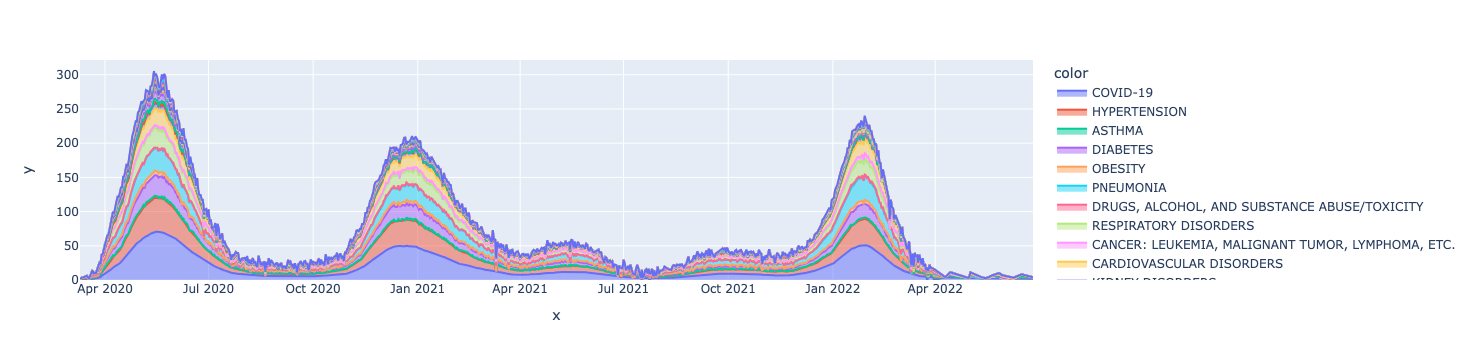

In [260]:
fig = make_subplots(rows=1, cols=1, subplot_titles=(""))

fig = px.area(x=df_covid_trend_monthly['DATE_OF_DEATH'], y=df_covid_trend_monthly['CASE_NUMBER'], color=df_covid_trend_monthly['GENERAL_MORBIDITY'])
fig.show()


In [271]:
total_values = df_covid.groupby('DATE_OF_DEATH')['CASE_NUMBER'].nunique().reset_index()
total_values['GENERAL_MORBIDITY'] = 'ALL DEATHS'
df_merge_covid = pd.concat([total_values, df_covid_trend_monthly], ignore_index=True)
df_merge_no_covid = df_merge_covid[df_merge_covid['GENERAL_MORBIDITY'] != 'COVID-19']
df_covid_trend_monthly.loc[:,'CASE_NUMBER'] = df_merge_no_covid.groupby('GENERAL_MORBIDITY')['CASE_NUMBER'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)
df_covid_trend_monthly.loc[:,'CASE_NUMBER'] = df_covid_trend_monthly['CASE_NUMBER'].fillna(0)
df_covid_trend_monthly

DATE_OF_DEATH  CASE_NUMBER  \
0        2020-03-10     1.000000   
1        2020-03-16     1.000000   
2        2020-03-17     1.000000   
3        2020-03-18     1.000000   
4        2020-03-19     1.400000   
5        2020-03-21     1.666667   
6        2020-03-22     1.857143   
7        2020-03-23     2.250000   
8        2020-03-24     2.333333   
9        2020-03-25     2.900000   
10       2020-03-26     3.272727   
11       2020-03-27     4.083333   
12       2020-03-28     4.538462   
13       2020-03-29     6.428571   
14       2020-03-30     7.466667   
15       2020-03-31     8.437500   
16       2020-04-01    10.235294   
17       2020-04-02    11.166667   
18       2020-04-03    12.578947   
19       2020-04-04    13.500000   
20       2020-04-05    14.904762   
21       2020-04-06    16.090909   
22       2020-04-07    17.608696   
23       2020-04-08    19.458333   
24       2020-04-09    20.520000   
25       2020-04-10    21.615385   
26       2020-04-11    22.555556   
27       2020-04-12    23.500000   
28       2020-04-13    24.689655   
29       2020-04-14    25.833333   
30       2020-04-15    27.700000   
31       2020-04-16    29.833333   
32       2020-04-17    32.300000   
33       2020-04-18    34.200000   
34       2020-04-19    36.366667   
35       2020-04-20    38.400000   
36       2020-04-21    40.400000   
37       2020-04-22    42.700000   
38       2020-04-23    45.000000   
39       2020-04-24    47.366667   
40       2020-04-25    49.233333   
41       2020-04-26    51.366667   
42       2020-04-27    53.033333   
43       2020-04-28    54.633333   
44       2020-04-29    56.400000   
45       2020-04-30    57.833333   
46       2020-05-01    58.900000   
47       2020-05-02    60.500000   
48       2020-05-03    61.900000   
49       2020-05-04    63.666667   
50       2020-05-05    64.933333   
51       2020-05-06    65.833333   
52       2020-05-07    66.933333   
53       2020-05-08    67.300000   
54       2020-05-09    68.666667   
55       2020-05-10    69.433333   
56       2020-05-11    70.266667   
57       2020-05-12    71.066667   
58       2020-05-13    71.566667   
59       2020-05-14    72.366667   
60       2020-05-15    73.133333   
61       2020-05-16    72.866667   
62       2020-05-17    72.566667   
63       2020-05-18    72.633333   
64       2020-05-19    71.933333   
65       2020-05-20    71.600000   
66       2020-05-21    71.566667   
67       2020-05-22    71.166667   
68       2020-05-23    70.933333   
69       2020-05-24    70.033333   
70       2020-05-25    69.333333   
71       2020-05-26    68.466667   
72       2020-05-27    68.066667   
73       2020-05-28    67.133333   
74       2020-05-29    65.933333   
75       2020-05-30    65.200000   
76       2020-05-31    64.366667   
77       2020-06-01    63.266667   
78       2020-06-02    62.266667   
79       2020-06-03    60.833333   
80       2020-06-04    59.433333   
81       2020-06-05    58.333333   
82       2020-06-06    56.866667   
83       2020-06-07    55.666667   
84       2020-06-08    53.633333   
85       2020-06-09    52.600000   
86       2020-06-10    51.200000   
87       2020-06-11    49.666667   
88       2020-06-12    48.500000   
89       2020-06-13    46.733333   
90       2020-06-14    44.766667   
91       2020-06-15    43.833333   
92       2020-06-16    42.533333   
93       2020-06-17    41.666667   
94       2020-06-18    40.966667   
95       2020-06-19    39.933333   
96       2020-06-20    38.300000   
97       2020-06-21    37.033333   
98       2020-06-22    35.300000   
99       2020-06-23    34.133333   
100      2020-06-24    33.266667   
101      2020-06-25    32.000000   
102      2020-06-26    31.033333   
103      2020-06-27    29.600000   
104      2020-06-28    28.700000   
105      2020-06-29    27.700000   
106      2020-06-30    26.433333   
107      2020-07-01    25.700000   
108      2020-07-02    24.500000   
109      2020-07-03    23.566667   
110      2

In [286]:
morbidity_list = list(df_merge_covid['GENERAL_MORBIDITY'])

morbidity_counts = Counter(morbidity_list)

# Extract unique values and count occurrences
unique_values_counts = df_no_covid['GENERAL_MORBIDITY'].value_counts()
unique_values_counts

ALL DEATHS                                           843
COVID-19                                             752
HYPERTENSION                                         730
PNEUMONIA                                            712
DIABETES                                             711
RESPIRATORY DISORDERS                                687
CARDIOVASCULAR DISORDERS                             686
OBESITY                                              575
CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.    501
KIDNEY DISORDERS                                     496
ALZHEIMER'S DISEASE, SENILE, OR DEMENTIA             365
ASTHMA                                               347
RENAL DISORDERS                                      339
DRUGS, ALCOHOL, AND SUBSTANCE ABUSE/TOXICITY         239
HYPOTHYRODISM                                        218
OTHER INFECTIOUS DISEASES                            201
AUTOIMMUNE DISORDERS                                 190
ENDOCRINE DISORDERS            

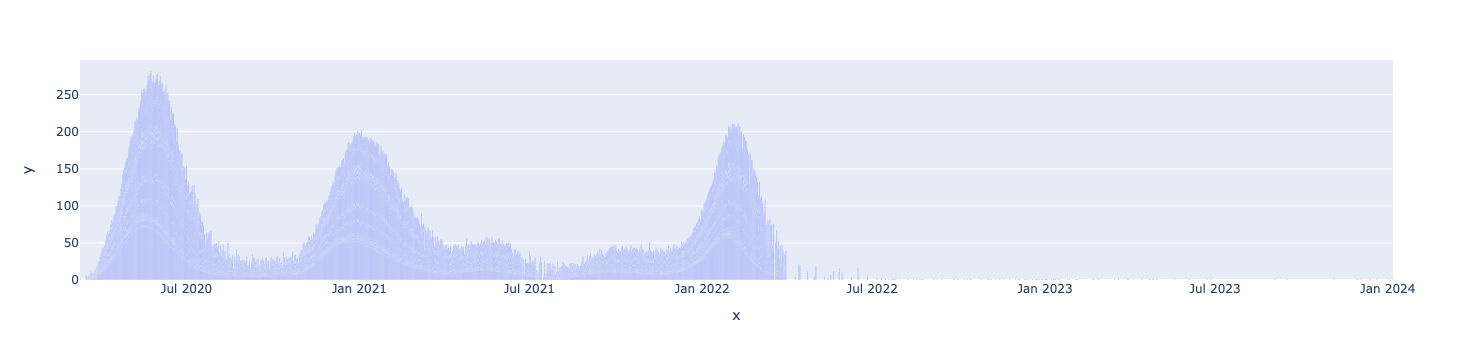

In [281]:
fig = make_subplots(rows=1, cols=1, subplot_titles=(""))

fig = px.bar(x=df_covid_trend_monthly_1['DATE_OF_DEATH'], y=df_covid_trend_monthly_1['CASE_NUMBER'])
fig.show()


In [288]:
# Group by day to add All Deaths value
total_values = df_covid.groupby('DATE_OF_DEATH')['CASE_NUMBER'].nunique().reset_index()
# Label as All Deaths
total_values['GENERAL_MORBIDITY'] = 'ALL DEATHS'
# Concat into dataframe
df_merge_covid = pd.concat([total_values, df_covid], ignore_index=True)
# Remove Covid-19 label as it is unnecessary
df_merge_no_covid = df_merge_covid[df_merge_covid['GENERAL_MORBIDITY'] != 'COVID-19']

morbidity_list = list(df_merge_no_covid['GENERAL_MORBIDITY'])

morbidity_counts = Counter(morbidity_list)

# Extract unique values and count occurrences
unique_values_counts = df_merge_no_covid['GENERAL_MORBIDITY'].value_counts()
total_values

DATE_OF_DEATH  CASE_NUMBER GENERAL_MORBIDITY
0      2020-03-10            1        ALL DEATHS
1      2020-03-16            1        ALL DEATHS
2      2020-03-17            1        ALL DEATHS
3      2020-03-18            1        ALL DEATHS
4      2020-03-19            3        ALL DEATHS
5      2020-03-21            3        ALL DEATHS
6      2020-03-22            3        ALL DEATHS
7      2020-03-23            5        ALL DEATHS
8      2020-03-24            3        ALL DEATHS
9      2020-03-25            8        ALL DEATHS
10     2020-03-26            7        ALL DEATHS
11     2020-03-27           13        ALL DEATHS
12     2020-03-28           10        ALL DEATHS
13     2020-03-29           31        ALL DEATHS
14     2020-03-30           22        ALL DEATHS
15     2020-03-31           23        ALL DEATHS
16     2020-04-01           39        ALL DEATHS
17     2020-04-02           27        ALL DEATHS
18     2020-04-03           38        ALL DEATHS
19     2020-04-04           31        ALL DEATHS
20     2020-04-05           43        ALL DEATHS
21     2020-04-06           41        ALL DEATHS
22     2020-04-07           51        ALL DEATHS
23     2020-04-08           62        ALL DEATHS
24     2020-04-09           46        ALL DEATHS
25     2020-04-10           49        ALL DEATHS
26     2020-04-11           47        ALL DEATHS
27     2020-04-12           49        ALL DEATHS
28     2020-04-13           58        ALL DEATHS
29     2020-04-14           59        ALL DEATHS
30     2020-04-15           57        ALL DEATHS
31     2020-04-16           65        ALL DEATHS
32     2020-04-17           75        ALL DEATHS
33     2020-04-18           58        ALL DEATHS
34     2020-04-19           68        ALL DEATHS
35     2020-04-20           64        ALL DEATHS
36     2020-04-21           63        ALL DEATHS
37     2020-04-22           74        ALL DEATHS
38     2020-04-23           72        ALL DEATHS
39     2020-04-24           79        ALL DEATHS
40     2020-04-25           63        ALL DEATHS
41     2020-04-26           77        ALL DEATHS
42     2020-04-27           60        ALL DEATHS
43     2020-04-28           79        ALL DEATHS
44     2020-04-29           75        ALL DEATHS
45     2020-04-30           66        ALL DEATHS
46     2020-05-01           71        ALL DEATHS
47     2020-05-02           75        ALL DEATHS
48     2020-05-03           80        ALL DEATHS
49     2020-05-04           84        ALL DEATHS
50     2020-05-05           81        ALL DEATHS
51     2020-05-06           68        ALL DEATHS
52     2020-05-07           84        ALL DEATHS
53     2020-05-08           73        ALL DEATHS
54     2020-05-09           87        ALL DEATHS
55     2020-05-10           72        ALL DEATHS
56     2020-05-11           72        ALL DEATHS
57     2020-05-12           73        ALL DEATHS
58     2020-05-13           73        ALL DEATHS
59     2020-05-14           83        ALL DEATHS
60     2020-05-15           80        ALL DEATHS
61     2020-05-16           57        ALL DEATHS
62     2020-05-17           66        ALL DEATHS
63     2020-05-18           60        ALL DEATHS
64     2020-05-19           47        ALL DEATHS
65     2020-05-20           54        ALL DEATHS
66     2020-05-21           62        ALL DEATHS
67     2020-05-22           62        ALL DEATHS
68     2020-05-23           65        ALL DEATHS
69     2020-05-24           52        ALL DEATHS
70     2020-05-25           42        ALL DEATHS
71     2020-05-26           51        ALL DEATHS
72     2020-05-27           48        ALL DEATHS
73     2020-05-28           51        ALL DEATHS
74     2020-05-29           39        ALL DEATHS
75     2020-05-30           44        ALL DEATHS
76     2020-05-31           46        ALL DEATHS
77     2020-06-01           42        ALL DEATHS
78     2020-06-02           50        ALL DEATHS
79     2020-06-03           41        ALL DEATHS
80     2020-06-04           39     

In [351]:
total_values = df_covid.groupby(['DATE_OF_DEATH'])['CASE_NUMBER'].unique().reset_index()
# Explode the 'Names' column
total_values = total_values.explode('CASE_NUMBER')

total_values_age = df_covid.groupby(['DATE_OF_DEATH', 'CASE_NUMBER'])['AGE'].unique().reset_index()
total_values_age = total_values_age.explode('AGE')
total_values['AGE'] = total_values_age['AGE']

total_values_gender = df_covid.groupby(['DATE_OF_DEATH', 'CASE_NUMBER'])['GENDER'].unique().reset_index()
total_values_gender = total_values_gender.explode('GENDER')
total_values['GENDER'] = total_values_gender['GENDER']

total_values_race = df_covid.groupby(['DATE_OF_DEATH', 'CASE_NUMBER'])['RACE'].unique().reset_index()
total_values_race = total_values_race.explode('RACE')
total_values['RACE'] = total_values_race['RACE']

total_values_latino = df_covid.groupby(['DATE_OF_DEATH', 'CASE_NUMBER'])['LATINO'].unique().reset_index()
total_values_latino = total_values_latino.explode('LATINO')
total_values['LATINO'] = total_values_latino['LATINO']

# Label as All Deaths
total_values['GENERAL_MORBIDITY'] = 'ALL DEATHS'

# df_exploded = df_exploded.explode('GENDER')
# df_exploded = df_exploded.explode('AGE')
# df_exploded = df_exploded.explode('RACE')
# df_exploded = df_exploded.explode('LATINO')

# Reset the index if needed
total_values.reset_index(drop=True, inplace=True)

df_merge_covid = pd.concat([total_values, df_covid], ignore_index=True)

total_values.head()

DATE_OF_DEATH   CASE_NUMBER AGE  GENDER   RACE LATINO GENERAL_MORBIDITY
0    2020-03-10  ME2020-01332  64  Female  Black  False        ALL DEATHS
1    2020-03-16  ME2020-01460  61  Female  Black  False        ALL DEATHS
2    2020-03-17  ME2020-01448  59    Male  Black  False        ALL DEATHS
3    2020-03-18  ME2020-01629  54    Male  White   True        ALL DEATHS
4    2020-03-19  ME2020-01501  83    Male  White  False        ALL DEATHS

In [352]:
total_values.count()

DATE_OF_DEATH        15454
CASE_NUMBER          15454
AGE                  15454
GENDER               15404
RACE                 15409
LATINO               15454
GENERAL_MORBIDITY    15454
dtype: int64

In [6]:
# Load Cook County Covid Mortality Data
file_path = Path("assets/final_data.csv")
# df_covid = pd.read_csv(file_path, dtype={6: str})

def load_data(file_path):
    # Read csv
    df = pd.read_csv(file_path, dtype={6: str})
    # Convert the Index 'Date of Death' to datetime
    df['DATE_OF_DEATH'] = pd.to_datetime(df['DATE_OF_DEATH'], errors='coerce').dt.date
    # Convert Age and Total Morbidities to Integer
    df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce').astype('Int64')
    df['TOTAL_MORBIDITIES'] = pd.to_numeric(df['TOTAL_MORBIDITIES'], errors='coerce').astype('Int64')
    # Shorten CANCER label
    df['GENERAL_MORBIDITY'] = df['GENERAL_MORBIDITY'].replace('CANCER: LEUKEMIA, MALIGNANT TUMOR, LYMPHOMA, ETC.', 'CANCER')
    # Convert NA's to numeric
    pd.to_numeric(df['AGE'], errors='coerce').astype('Int64')
    # Remove Covid-19 label as it is unnecessary
    df_no_covid = df[df['GENERAL_MORBIDITY'] != 'COVID-19']
    return df_no_covid

df_no_covid = load_data(file_path)

morbidity_list = list(df_no_covid['GENERAL_MORBIDITY'])

In [3]:
morbidity_list = list(df_no_covid['GENERAL_MORBIDITY'])

NameError: name 'df_no_covid' is not defined

In [ ]:
filtered_df = df_no_covid[(pd.to_datetime(df_no_covid['DATE_OF_DEATH']) >= pd.to_datetime(start_date)) & (pd.to_datetime(df_no_covid['DATE_OF_DEATH']) <= pd.to_datetime(end_date))]
# Filter data based on selected age range
filtered_df = filtered_df[filtered_df['AGE'].between(age[0], age[1])]
# Filter by sex
filtered_df['GENDER'] = filtered_df['GENDER'].fillna('Unknown')
filtered_df = filtered_df[filtered_df['GENDER'].isin(sex)]
# Filter_by_race
filtered_df['RACE'] = filtered_df['RACE'].fillna('Unknown')
filtered_df = filtered_df[filtered_df['RACE'].isin(race)]
filtered_data = filtered_df.groupby(['DATE_OF_DEATH', 'GENERAL_MORBIDITY'])['CASE_NUMBER'].nunique().reset_index()